# Hazard rate plot and parameter estimation in the Gompertz--Makeham model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

The array `my_sample` contains $n$ realisations $T_1, \ldots, T_n$.

Size of the sample: 100000


(array([9.68816835e-01, 9.70912330e-01, 9.49957387e-01, 9.07349005e-01,
        8.67068949e-01, 8.47278170e-01, 8.13750262e-01, 7.80222354e-01,
        7.73703039e-01, 7.28533496e-01, 6.89417604e-01, 7.04318896e-01,
        6.61012015e-01, 6.46576388e-01, 6.28648271e-01, 5.89066713e-01,
        5.84177227e-01, 5.65783444e-01, 5.28064548e-01, 4.95467971e-01,
        4.78936849e-01, 4.58680405e-01, 4.35629969e-01, 4.22125672e-01,
        4.19331680e-01, 3.85105274e-01, 3.78818791e-01, 3.47619211e-01,
        3.31553755e-01, 3.21076284e-01, 3.01285505e-01, 2.98025847e-01,
        2.91739364e-01, 2.57745791e-01, 2.49596647e-01, 2.18164233e-01,
        2.04427104e-01, 2.15370241e-01, 1.83472162e-01, 1.78117010e-01,
        1.71364862e-01, 1.59024729e-01, 1.58326231e-01, 1.41562277e-01,
        1.29920643e-01, 1.27359483e-01, 1.09897031e-01, 9.80225637e-02,
        9.47629060e-02, 8.77779253e-02, 8.35869368e-02, 8.45182676e-02,
        7.00826406e-02, 5.68111771e-02, 6.19334963e-02, 6.030366

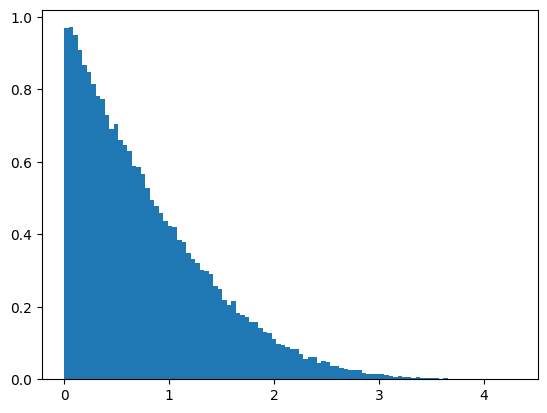

In [3]:
# Sample
my_sample = np.loadtxt('gompertz-dataset.csv', delimiter=',')

# Size of the sample
n = np.shape(my_sample)[0]
print("Size of the sample:", n)

# Histogram
plt.hist(my_sample, density=True, bins=100)

Using the approximation of the survival function
$$\mathbb{P}(T>t) \simeq \frac{1}{n}\sum_{i=1}^n \mathbf{1}_{\{T_i>t\}}$$
complete the following code so that the function `survival(t)` returns $\mathbb{P}(T>t)$, and the function `hazard(t,h)` returns $h^{-1}\mathbb{P}(T \in (t,t+h] | T > t)$.

In [4]:
def survival(t):
  return np.sum(my_sample>t)/n

In [5]:
def hazard(t,h):
  survival_t = survival(t)
  survival_th = survival(t+h)
  return (survival_t-survival_th)/(h*survival_t)

We may now plot the survival function and the hazard rate, for a sufficiently small value of $h$. You may try to observe and understand what happens when you vary the value of $h$ by changing `n_t`.

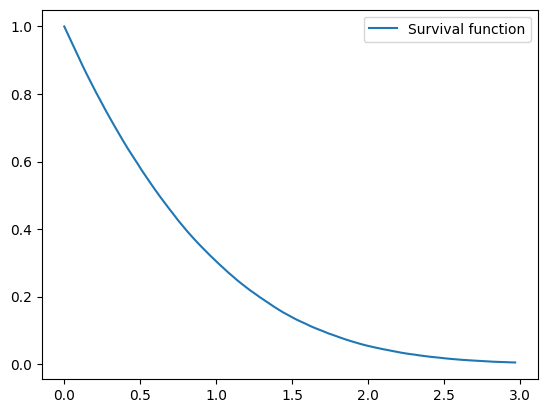

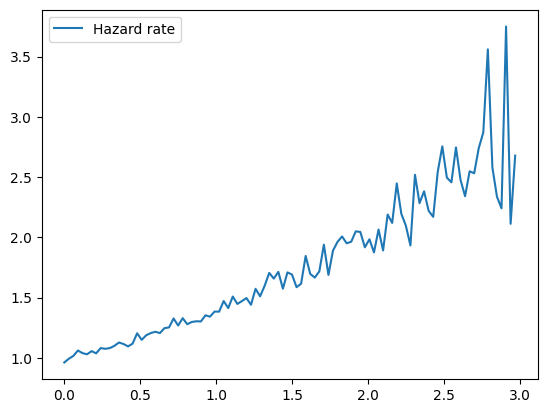

In [6]:
# Grid of values of t
n_t = 100
t_max = 3
h = t_max/n_t
vect_of_t = np.arange(n_t)*h

# Survival function
plt.plot(vect_of_t, [survival(t) for t in vect_of_t], label='Survival function')
plt.legend()
plt.show()

# Hazard rate
plt.plot(vect_of_t, [hazard(t,h) for t in vect_of_t], label='Hazard rate')
plt.legend()
plt.show()